# Assignment IV: Text Vectorization

## Question 1

Use `nltk.corpus.inaugural` as the corpus data for this exercise. It is a collection of US presidential inaugural speeches over the years. Cluster all the inaugural speeches collected in the corpus based on their bag-of-words vectorized representations.

Please consider the following settings for bag-of-words model:
- Use the English stopwords provided in `nltk.corpus.stopwords.words('english')` to remove uninformative words.
- Lemmatize word tokens using `WordNetLemmatizer()`.
- Normalize the letter casing.
- Include in the Bag-of-words model only words consisting as alphabets or hyphens.
- Use `TfIdfVectorizer()` for bag-of-word vectorization.

##**Load packages**

In [1]:
import nltk
import pandas as pd
from nltk.corpus import inaugural, stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Download necessary NLTK resources
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##**Preprocess speeches: stopwords removal, pos tagging, and lemmatization**

In [2]:
# Initialize the WordNetLemmatizer
wnl = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
      return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not found

# Function to preprocess speeches
def preprocess(text):
    # Remove stopwords
    stopwords_list = stopwords.words('english')
    tokens = [word for word in word_tokenize(text.lower()) if (word.isalpha() or "-" in word) and word.lower() not in stopwords_list]
    # POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Lemmatization
    lemmatized_words = [wnl.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    return ' '.join(lemmatized_words)

# Load the inaugural speeches
speeches = [inaugural.raw(fileid) for fileid in inaugural.fileids()]
document_names = [fileid[:-4].replace('-', ' ') for fileid in inaugural.fileids()]
document_names = [name.replace(' ', '-', 1) if name[4] == ' ' else name for name in document_names]

# Preprocess the speeches
preprocessed_speeches = [preprocess(speech) for speech in speeches]

##**Vectorize terms found in the speeches**

In [3]:
# Vectorization with TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_speeches)

# Create the DataFrame
tfidf_df = pd.DataFrame(X.toarray(), index = document_names, columns = vectorizer.get_feature_names_out())
tfidf_df

,abandon,abandonment,abate,abdicate,abeyance,abhor,abide,abiding,ability,abject,...,yield,york,yorktown,young,youth,youthful,zeal,zealous,zealously,zone
1789-Washington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1793-Washington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1797-Adams,0.023063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.026416,0.000000,0.000000,0.000000
1801-Jefferson,0.030391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.034810,0.000000,0.000000,0.000000
1805-Jefferson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.085674,0.000000,0.000000,0.000000
1809-Madison,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050929,0.000000
1813-Madison,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1817-Monroe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.030715,0.020218,0.023048,0.000000,0.030715
1821-Monroe,0.028371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011496,0.000000,...,0.014185,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018522,0.017657,0.000000
1825-Adams,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016022,0.000000,...,0.039541,0.00000,0.000000,0.000000,0.000000,0.000000,0.022645,0.000000,0.000000,0.000000


##**Calculate cosine similarties between documents**

In [4]:
# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X)

# Convert the cosine similarity matrix to a DataFrame
# Document names serve as both row indices and column names
similarity_df = pd.DataFrame(cosine_sim_matrix, index = document_names, columns = document_names)
similarity_df

,1789-Washington,1793-Washington,1797-Adams,1801-Jefferson,1805-Jefferson,1809-Madison,1813-Madison,1817-Monroe,1821-Monroe,1825-Adams,...,1985-Reagan,1989-Bush,1993-Clinton,1997-Clinton,2001-Bush,2005-Bush,2009-Obama,2013-Obama,2017-Trump,2021-Biden
1789-Washington,1.000000,0.128225,0.273912,0.239183,0.229412,0.221224,0.167709,0.300074,0.271256,0.253901,...,0.162981,0.139957,0.117304,0.147298,0.148151,0.174279,0.154971,0.151415,0.119797,0.136312
1793-Washington,0.128225,1.000000,0.125592,0.113205,0.117537,0.063022,0.079265,0.110535,0.116033,0.091116,...,0.063234,0.050823,0.079811,0.057310,0.073845,0.100359,0.058054,0.087948,0.085552,0.077856
1797-Adams,0.273912,0.125592,1.000000,0.281192,0.279749,0.279801,0.191178,0.377609,0.335523,0.366309,...,0.209178,0.186834,0.180365,0.211747,0.189077,0.238919,0.207796,0.203254,0.186540,0.180135
1801-Jefferson,0.239183,0.113205,0.281192,1.000000,0.308258,0.255982,0.168974,0.305198,0.274118,0.313394,...,0.227631,0.209951,0.155163,0.206608,0.186875,0.223054,0.211503,0.201673,0.145987,0.184478
1805-Jefferson,0.229412,0.117537,0.279749,0.308258,1.000000,0.253616,0.179558,0.338639,0.340122,0.315024,...,0.177223,0.177092,0.138549,0.151670,0.184253,0.203119,0.187153,0.189880,0.118032,0.153849
1809-Madison,0.221224,0.063022,0.279801,0.255982,0.253616,1.000000,0.201318,0.305502,0.277756,0.299526,...,0.151967,0.121094,0.108260,0.124646,0.138859,0.166397,0.139166,0.136256,0.108225,0.136502
1813-Madison,0.167709,0.079265,0.191178,0.168974,0.179558,0.201318,1.000000,0.259563,0.265609,0.185939,...,0.122646,0.107579,0.100730,0.116516,0.140600,0.156947,0.141667,0.147134,0.103009,0.125069
1817-Monroe,0.300074,0.110535,0.377609,0.305198,0.338639,0.305502,0.259563,1.000000,0.546214,0.401299,...,0.227415,0.203165,0.153845,0.190051,0.183825,0.211523,0.203716,0.202680,0.167315,0.174735
1821-Monroe,0.271256,0.116033,0.335523,0.274118,0.340122,0.277756,0.265609,0.546214,1.000000,0.371732,...,0.213565,0.199286,0.154837,0.192547,0.180282,0.205088,0.200239,0.218442,0.158839,0.176150
1825-Adams,0.253901,0.091116,0.366309,0.313394,0.315024,0.299526,0.185939,0.401299,0.371732,1.000000,...,0.233654,0.175239,0.130888,0.201302,0.190289,0.215303,0.186610,0.205801,0.148295,0.160423


##**Visualize the similarties by hierarchical clustering**

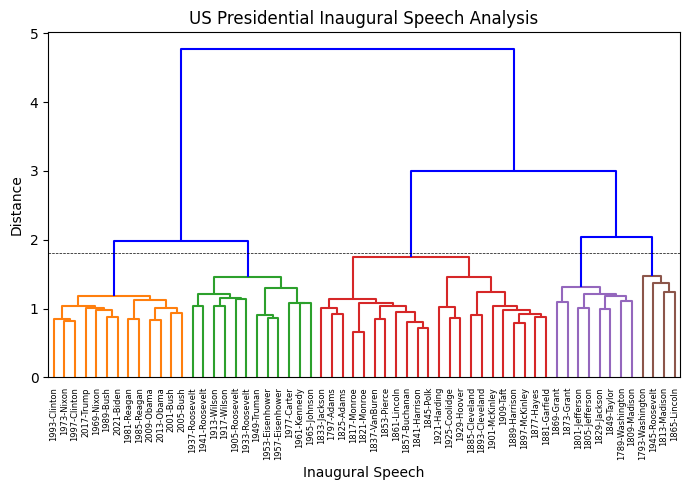

In [5]:
# Perform hierarchical clustering
Z = linkage(cosine_sim_matrix, 'ward')

# Document labels for the dendrogram
texts_id = similarity_df.columns.tolist()

# Plotting the dendrogram
plt.figure(figsize=(7, 5))
plt.title('US Presidential Inaugural Speech Analysis')
plt.xlabel('Inaugural Speech')
plt.ylabel('Distance')
color_threshold = 1.8
dendrogram(Z, color_threshold=color_threshold, labels=texts_id, above_threshold_color='b')
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

## Question 2

Please use the Chinese song lyrics from the directory, `demo_data/ChineseSongLyrics`, as the corpus for this exercise. The directory is a collection of song lyrics from nine Chinese pop-song artists.

Please utilize the bag-of-words method to vectorize each artist's song lyrics and provide a cluster analysis of each artist in terms of their textual similarities in lyrics.

A few notes for data processing:
- Please use `ckip-transformers` for word segmentation and POS tagging.
- Please build the bag-of-words model using the `Tfidfvectorizer()`.
- Please include in the model only words (a) whose POS tags start with 'N' or 'V', and (b) which consist of NO digits, alphabets, symbols and punctuations.
- Please make sure you have the word tokens intact when doing the vectorization using `Tfidfvectorizer()`.

The expected result is a dendrogram as shown below. But please note that depending on how you preprocess the data and adjust the parameters of bag-of-words representations, we may have somewhat different results. Please indicate and justify your parameter settings in the bag-of-words model creation (i.e., using markdown cells in notebook).

##**Load packages**

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

##**Set working directory in Google Drive**

In [7]:
import os
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
os.chdir('/content/drive/MyDrive/ENC2045_demo_data/ChineseSongLyrics')
print(os.getcwd())

/content/drive/MyDrive/ENC2045_demo_data/ChineseSongLyrics


##**Install CKIP Transformers**

In [9]:
!pip install -U ckip-transformers

In [10]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger

word_segmenter = CkipWordSegmenter(device=0)
pos_tagger = CkipPosTagger(device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


##**Preprocess lyrics: remove non-Chinese characters**

In [11]:
# Function to remove non-Chinese characters
def remove_non_chinese(text):
    pattern = r'[^\u4e00-\u9fa5]'
    text = re.sub(pattern, '', text)
    return text

# Initialize an empty dictionary to store lyrics, keyed by artist name (or file name)
lyrics_by_artist = {}

# Iterate through each file in the directory
for file_name in os.listdir():
    if file_name.endswith('.txt'):
        # Extract artist name from the file name, assuming the file name is the artist's name
        artist_name = file_name[:-4]  # Remove the '.txt' extension
        with open(file_name, 'r', encoding='utf-8') as file:
            lyrics = file.read()
            # Preprocess the lyrics to remove unwanted characters
            cleaned_lyrics = remove_non_chinese(lyrics)
            # Store the cleaned lyrics in the dictionary, each artist's lyrics as a single string
            lyrics_by_artist[artist_name] = cleaned_lyrics

# Convert each artist's lyrics into a list
lyrics_by_artist_list = {artist: lyrics.split('\n') for artist, lyrics in lyrics_by_artist.items()}

# print(lyrics_by_artist_list)

##**Lyrics Segmentation & POS tagging**

In [12]:
# Create placeholders for segmented lyrics and pos-tagged lyrics
segmented_lyrics_by_artist = {}
pos_tagged_lyrics_by_artist = {}

for artist, lyrics_list in lyrics_by_artist_list.items():
    # Join the list of lyrics into a single string for processing
    lyrics_text = '\n'.join(lyrics_list)
    # Segmenting
    segmented_lyrics = word_segmenter([lyrics_text])
    # POS Tagging
    pos_tags = pos_tagger(segmented_lyrics)

    # Storing the results
    segmented_lyrics_by_artist[artist] = segmented_lyrics
    pos_tagged_lyrics_by_artist[artist] = pos_tags

Inference: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


In [13]:
# Check the results
# print(segmented_lyrics_by_artist[artist])
# print(pos_tagged_lyrics_by_artist[artist])

##**Filter out nouns and verbs in the lyrics**

In [14]:
filtered_lyrics_by_artist = {}

for artist, pos_lists in pos_tagged_lyrics_by_artist.items():
    segmented_lyrics = segmented_lyrics_by_artist[artist]

    filtered_words_for_artist = []
    for pos_list, segmented_list in zip(pos_lists, segmented_lyrics):  # Iterate in parallel
        # Filter words based on POS tags
        filtered_words = [word for word, tag in zip(segmented_list, pos_list) if tag.startswith(('N', 'V'))]
        filtered_words_for_artist.extend(filtered_words)

    filtered_lyrics_by_artist[artist] = filtered_words_for_artist

# Check the results
# print(filtered_lyrics_by_artist[artist])

##**Vectorize nouns and verbs found in the lyrics**

In [15]:
# Join the segmented and filtered words for each artist into a single string
documents = [' '.join(words) for artist, words in filtered_lyrics_by_artist.items()]

# Keep artist names to label the DataFrame rows
artist_names = list(filtered_lyrics_by_artist.keys())

In [16]:
# Initialize and fit_transform with TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [17]:
# Convert the TF-IDF matrix into a DataFrame
tv_df = pd.DataFrame(tfidf_matrix.toarray(), index = artist_names, columns = tfidf_vectorizer.get_feature_names_out())
tv_df

,一丁點,一下,一下子,一世,一串串,一九,一九九五年,一九四三,一二三四,一些,...,齒輪,龍山寺,龍形,龍戰,龍拳,龍捲風,龐大,龕離,龜毛,龜苓膏
高爾宣,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
林俊傑,0.000000,0.017079,0.000000,0.000000,0.000000,0.000000,0.000000,0.003964,0.000000,0.037770,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
鄧紫棋,0.000000,0.005827,0.016813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028401,0.000000,0.000000,0.000000,0.000000
蔡依林,0.000000,0.028728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019018,...,0.000000,0.003453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013814,0.000000
周興哲,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
張惠妹,0.000000,0.006841,0.000000,0.003704,0.000000,0.000000,0.000000,0.000000,0.000000,0.022294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
周杰倫,0.000000,0.012654,0.000000,0.000000,0.003477,0.000000,0.000000,0.005874,0.013908,0.007364,...,0.000000,0.000000,0.003477,0.003477,0.003477,0.029368,0.000000,0.003477,0.000000,0.003477
陳奕迅,0.005362,0.026482,0.000000,0.002264,0.000000,0.002681,0.002681,0.000000,0.000000,0.037475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010723,0.000000,0.000000,0.000000
田馥甄,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017892,...,0.008448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##**Calculate cosine similarties between singers' lyrics**

In [18]:
similarity_doc = cosine_similarity(tfidf_matrix)

# Convert the cosine similarity matrix to a DataFrame
similarity_doc_df = pd.DataFrame(similarity_doc, index = artist_names, columns = artist_names)
similarity_doc_df

,高爾宣,林俊傑,鄧紫棋,蔡依林,周興哲,張惠妹,周杰倫,陳奕迅,田馥甄
高爾宣,1.000000,0.359135,0.286402,0.290520,0.290468,0.312469,0.317600,0.323506,0.272330
林俊傑,0.359135,1.000000,0.565223,0.596901,0.642710,0.661388,0.611057,0.623787,0.549032
鄧紫棋,0.286402,0.565223,1.000000,0.477003,0.489614,0.530414,0.491761,0.529569,0.449646
蔡依林,0.290520,0.596901,0.477003,1.000000,0.523305,0.651064,0.542952,0.563919,0.566387
周興哲,0.290468,0.642710,0.489614,0.523305,1.000000,0.588881,0.519503,0.538350,0.486449
張惠妹,0.312469,0.661388,0.530414,0.651064,0.588881,1.000000,0.579911,0.628696,0.626671
周杰倫,0.317600,0.611057,0.491761,0.542952,0.519503,0.579911,1.000000,0.549098,0.478244
陳奕迅,0.323506,0.623787,0.529569,0.563919,0.538350,0.628696,0.549098,1.000000,0.529543
田馥甄,0.272330,0.549032,0.449646,0.566387,0.486449,0.626671,0.478244,0.529543,1.000000


##**Visualize the similarties by hierarchical clustering**

In [19]:
# Perform hierarchical clustering
Z = linkage(similarity_doc, method='ward')

In [20]:
# Download Chinese font `taipei_sans_tc_beta.ttf`

import matplotlib as mpl
from matplotlib.font_manager import fontManager

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-14 19:28:02--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.127.138, 108.177.127.102, 108.177.127.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-14 19:28:02--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.143.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  68.5MB/s    in 0.3s    

2024-03-14 19

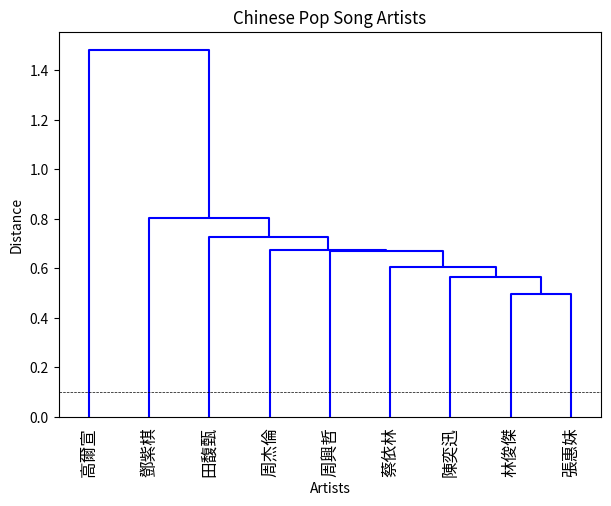

In [21]:
plt.figure(figsize=(7, 5))
plt.title('Chinese Pop Song Artists')
plt.xlabel('Artists')
plt.ylabel('Distance')
color_threshold = 0.1

# Ensure labels are correctly ordered
fileids = similarity_doc_df.columns.tolist()

dendrogram(Z, labels=fileids, leaf_rotation=90, color_threshold=color_threshold, above_threshold_color='b')
plt.axhline(y=color_threshold, c='k', ls='--', lw=0.5)
plt.show()